<a href="https://colab.research.google.com/github/Bhuvanesh-Singla/software-defect-detection/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectPercentile, chi2

In [2]:
!wget https://raw.githubusercontent.com/Bhuvanesh-Singla/software-defect-detection/main/jm1.arff
!wget https://raw.githubusercontent.com/Bhuvanesh-Singla/software-defect-detection/main/cm1.arff

--2023-10-30 07:53:22--  https://raw.githubusercontent.com/Bhuvanesh-Singla/software-defect-detection/main/jm1.arff
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 861589 (841K) [text/plain]
Saving to: ‘jm1.arff’

jm1.arff            100%[===================>] 841.40K  --.-KB/s    in 0.06s   

2023-10-30 07:53:22 (13.0 MB/s) - ‘jm1.arff’ saved [861589/861589]

--2023-10-30 07:53:22--  https://raw.githubusercontent.com/Bhuvanesh-Singla/software-defect-detection/main/cm1.arff
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56758 (55

In [7]:
from scipy.io import arff
train_data = arff.loadarff('jm1.arff')
test_data = arff.loadarff('cm1.arff')
df = pd.DataFrame(train_data[0])
test_df = pd.DataFrame(test_data[0])

In [8]:
df

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2.0,2.0,2.0,2.0,1.2,1.2,1.2,1.2,1.4,b'false'
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,b'true'
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51.0,10.0,8.0,1.0,17.0,36.0,112.0,86.0,13.0,b'true'
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129.0,29.0,28.0,2.0,17.0,135.0,329.0,271.0,5.0,b'true'
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28.0,1.0,6.0,0.0,11.0,16.0,76.0,50.0,7.0,b'true'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,...,13.0,0.0,2.0,0.0,10.0,15.0,30.0,22.0,7.0,b'false'
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,...,5.0,0.0,2.0,0.0,12.0,8.0,19.0,11.0,3.0,b'false'
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,...,29.0,1.0,10.0,0.0,18.0,15.0,59.0,44.0,7.0,b'false'
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,...,6.0,0.0,2.0,0.0,9.0,8.0,21.0,15.0,1.0,b'false'


In [9]:
df.defects.replace({b'false': 0 ,b'true': 1}, inplace = True)
test_df.defects.replace({b'false': 0 ,b'true': 1}, inplace = True)

In [10]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan, strategy = 'mean').set_output(transform='pandas')
si.fit(df)
df = si.transform(df)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [12]:
scaler = StandardScaler()
X = df.drop('defects', axis = 1)
y = df.defects

In [13]:
X_scaled = scaler.fit_transform(X)

In [16]:
n_components = 15
pca = PCA(n_components = n_components)
pca.fit(X_scaled)
data_pca = pca.transform(X_scaled)
data_pca = pd.DataFrame(data_pca, columns = ['PC' + str(i+1) for i in range(n_components)])

In [17]:
data_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-1.731345,0.471441,4.676893,3.693167,-1.116295,2.841765,-2.731774,-0.930430,-0.439669,0.697234,-0.089106,-0.354166,0.018152,0.188627,0.250632
1,-1.842240,0.494230,3.675827,2.606947,-0.937996,1.919767,-1.915877,-0.742915,-0.234529,0.588110,-0.016969,-0.297919,0.045207,0.164252,0.163867
2,1.355724,-1.077229,-0.378864,-0.188008,0.234120,-0.061153,-0.108981,0.544371,0.175991,-0.004316,-0.295933,0.011488,-0.047666,0.007968,-0.114518
3,6.632916,-6.599504,-0.024454,0.613568,-2.401480,0.663544,0.904497,2.474252,0.501188,-0.920021,0.157502,0.762987,-0.511893,0.722822,-0.264468
4,-0.090785,-0.338934,-0.087366,-0.460445,0.086398,-0.203398,0.336371,-0.119601,-0.098252,-0.068730,-0.203678,-0.013672,0.052403,0.001714,-0.039821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,-0.851739,-0.014768,0.163259,-0.221998,-0.075307,0.187596,0.244567,0.235820,0.076689,-0.102323,-0.118408,0.008869,0.112609,-0.015190,-0.017451
10881,-1.227551,0.113996,0.121998,-0.357836,0.314027,-0.029975,0.049220,0.056452,-0.006618,-0.083993,0.082795,-0.149313,0.080858,-0.102822,0.087833
10882,0.051100,-0.312209,-0.288923,-0.872939,0.645384,-0.263562,-0.175815,-0.279313,-0.632853,-0.023813,-0.061578,-0.065083,-0.051269,-0.009301,0.023801
10883,-1.301422,0.008906,0.201928,-0.239118,0.219386,-0.155937,0.185209,-0.053448,0.039860,-0.079186,0.119628,-0.089313,0.035522,-0.004937,0.013501


In [18]:
import seaborn as sns

<Axes: >

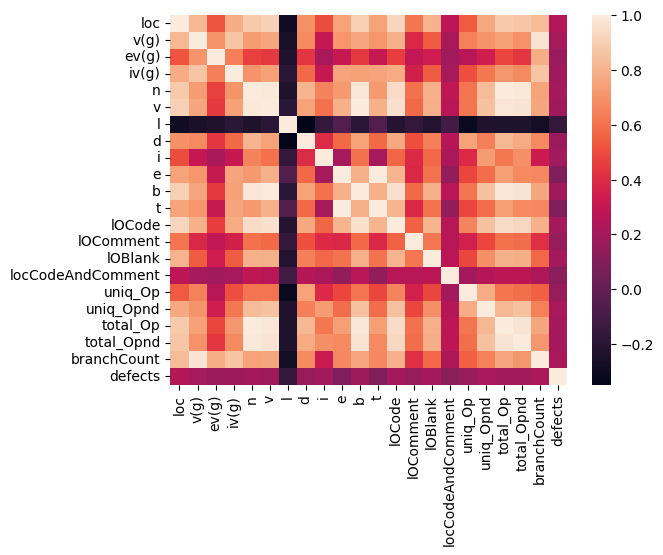

In [22]:
sns.heatmap(df.corr())

<Axes: >

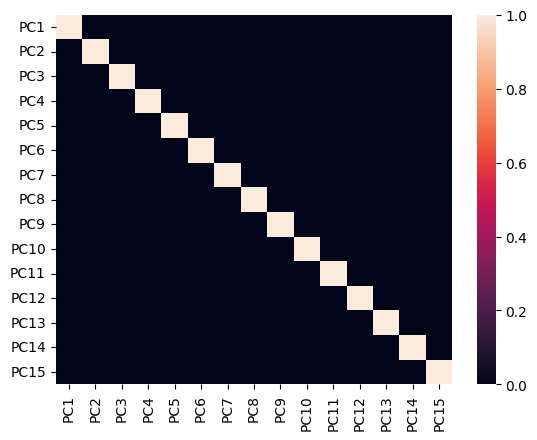

In [21]:

sns.heatmap(data_pca.corr())

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log_reg = LogisticRegression()

In [25]:
log_reg.fit(data_pca, y)

LogisticRegression()

In [26]:
X_test = test_df.drop('defects', axis = 1)
y_test = test_df.defects

In [27]:
X_test_scaled = scaler.transform(X_test)

In [28]:
n_components = 15
test_data_pca = pca.transform(X_test_scaled)
test_data_pca = pd.DataFrame(test_data_pca, columns = ['PC' + str(i+1) for i in range(n_components)])

In [30]:
score1 = log_reg.score(test_data_pca, y_test)
print(score1)

0.8654618473895582


In [37]:
log_reg2 = LogisticRegression(max_iter =10000 )

In [38]:
log_reg2.fit(X_scaled, y)

LogisticRegression(max_iter=10000)

In [39]:
score2 = log_reg2.score(X_test_scaled, y_test)

In [40]:
score2

0.8634538152610441

In [41]:
selector = SelectPercentile(chi2, percentile=80)
selector.fit(df, df['defects'])
mask = selector.get_support()
features = df.iloc[:,mask]

In [42]:
X = features.drop('defects', axis = 1)
y = features.defects

In [43]:
X_scaled = scaler.fit_transform(X)

In [46]:
log_reg3 = LogisticRegression(max_iter = 10000)

In [47]:
log_reg3.fit(X_scaled, y)

LogisticRegression(max_iter=10000)

In [48]:
test_features = test_df.iloc[:,mask]

In [49]:
X_test = test_features.drop('defects', axis = 1)
y_test = test_features.defects

In [50]:
X_test = scaler.transform(X_test)

In [51]:
score3 = log_reg3.score(X_test, y_test)

In [52]:
score3

0.8714859437751004

In [54]:
print(f'''
Score using:
1. Full dataset with PCA: {round(score1 * 100, 4)}%
2. Full dataset: {round(score2*100,4)}%
3. Features selected using chi-squared distribution: {round(score3*100,4)}%      ''')


Score using:
1. Full dataset with PCA: 86.5462%
2. Full dataset: 86.3454%
3. Features selected using chi-squared distribution: 87.1486%      
